## This notebook is used for identifying **dihydroxy BA compounds in GNPS Library by SMILES**
(original notebook content: v_di_3_7_M+H_substruct_df_for_manuscript.ipynb)

---

### About the process
Mono-, di-, tri-, and tetra-hydroxy bile acids are all identified by the monohydroxy bile acid substructure defined by the single hydroxylation event at C3.

To specifically identify di-BA, we must use specific substructures to:
1. Isolate and remove mono-BA from the set
2. Isolate and remove tetra- and tri-BA from the set

Tetra- and trihydroxy bile acids are removed from the set of compounds by identifying compounds with more than two hydroxylation events, which are commonly described as compounds with three hydroxylation events: C3, C6, and C7; C3, C6, and C12; and C3, C7, and C12.

Once removed, the resulting set of compounds are di- and mono-hydroxylated bile acids.

To **isolate dihydroxy bile acids** in the set, we identify common dihydroxy bile acids **by substructures defined by two hydroxylation events: C3 and C6; C3 and C7; and C3 and C12**. 

---
### Section 1: Read clean GNPS Library data
- already removed spectrum_ids associated with SUSPECT LIST data
- only includes spectrum_ids associated with M+H adduct

### Section 2: Identify all BA
- mono, di, tri, tetra from substructure

### Section 3: Identify common dihydroxy BA
- isolate tetra- and tri-hydroxy BA (to eventually remove from dihydroxy search)
- identify common dihydroxy BA of interest by substructure
- remove tetra- and tri-hydroxy BA from dihydroxy search


## Input files needed for the Notebook
1. **Cleaned** GNPS Library metadata from clean_GNPS_Library_data.ipynb

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

In [2]:
# from v_rdkit_functions.py
import v_rdkit_functions
from v_rdkit_functions import mol_from_smiles_in_library
from v_rdkit_functions import substruct_search_from_smiles

### Section 1: Read clean GNPS Library data

In [32]:
# from shape_GNPS_Library_data.ipynb

input_library_cleaned = pd.read_csv('/home/jovyan/work/notebooks/outputs/CLEANED_GNPS_input_library.csv',sep=',', index_col='spectrum_id',low_memory=False)

In [33]:
len(input_library_cleaned)

245648

In [35]:
# identify molecules described in GNPS Library from SMILES in metadata
smiles_w_rdkit_obj_dict = mol_from_smiles_in_library(input_library_cleaned)

# ERRORS ARE EXPECTED!!!

[20:23:43] SMILES Parse Error: syntax error while parsing: 
[20:23:43] SMILES Parse Error: Failed parsing SMILES ' ' for input: ' '
[20:23:43] SMILES Parse Error: syntax error while parsing: N/A
[20:23:43] SMILES Parse Error: Failed parsing SMILES ' N/A' for input: ' N/A'
[20:23:43] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)
[20:23:43] SMILES Parse Error: Failed parsing SMILES ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)' for input: ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)'
[20:23:43] Can't kekulize mol.  Unkekulized atoms: 10 11 12 14 16
[20:23:44] Explicit valence for atom # 22 O, 3, is greater than permitted
[20:23:44] Explicit valence for atom # 31 O, 3, is greater than permitted
[20:23:44] Explicit valence for atom # 6 O, 3, is greater than 

In [36]:
len(smiles_w_rdkit_obj_dict)

29677

### Section 2: Substructure matching for all BA

In [37]:
# monohydroxy bile acid substructure that captures mono-, di-, tri-, and tetra-BA variations
mono_di_tri_tetra = 'O=CCC[C@@H](C)C1CC[C@@]2([H])C3CC[C@]4([H])CC(O)CC[C@]4(C)[C@@]3([H])CC[C@@]21C'

In [38]:
# Construct a molecule from a SMILES string using RDKit
mono_di_tri_tetra_mol = Chem.MolFromSmiles(mono_di_tri_tetra)

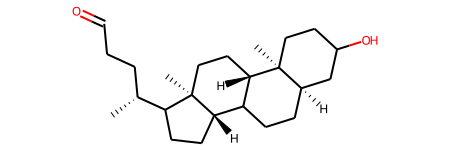

In [39]:
# View molecule
mono_di_tri_tetra_mol

In [40]:
# Subselection of GNPS Library dataframe for rows containing substructure of interest
library_df_w_Mono_di_tri_tetra_matched = substruct_search_from_smiles(input_library_cleaned, smiles_w_rdkit_obj_dict, mono_di_tri_tetra)

In [41]:
len(library_df_w_Mono_di_tri_tetra_matched)

1406

### Section 3: Substructure matching for dihydroxy BA

#### identify tetra- and tri-hydroxy BA (to eventually remove to isolate di-)

In [42]:
# substructures to identify specific tetra- and tri-hydroxy BA
tri_tetra = ['O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([H])([C@@]21C)[H])[H])C)O)[H])O)O)[H])C',
             'O=CCC[C@@H](C)C1CC[C@@]2([H])C3C(O)C([H])([H])[C@]4([H])CC(O)CC[C@]4(C)[C@@]3([H])CC(O)[C@@]21C',
             'O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([C@@]21C)O)[H])C)O)[H])O)([H])[H])[H])C']

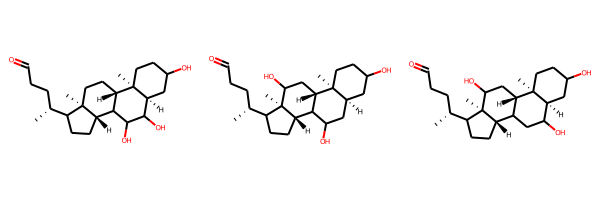

In [43]:
# Construct molecules from SMILES string using RDKit
tri_tetra_mol = [Chem.MolFromSmiles(x) for x in tri_tetra]

# View molecules
Draw.MolsToGridImage(tri_tetra_mol)

In [44]:
# identify tri- and tetra-BA described in GNPS Library from SMILES in metadata
tri_tetra_mol_matched_list = [k for k,v in smiles_w_rdkit_obj_dict.items() for item in tri_tetra_mol if v.HasSubstructMatch(item)]

In [45]:
# Subselection of GNPS Library dataframe for rows containing tri- and tetra-BA
library_df_w_tri_tetra_matched = input_library_cleaned[input_library_cleaned['Smiles'].isin(tri_tetra_mol_matched_list)]

In [46]:
len(library_df_w_tri_tetra_matched)

621

#### identify molecules that contain dihydroxy-BA substructure

In [47]:
# substructure to include all three dihydroxy BA variations
# substructure will also includes tetra- and tri-hydroxy BA (therefore, need to remove)

di_tri_tetra = ['O=CCC[C@@H](C)C1CC[C@@]2([H])C3C(O)C([H])([H])[C@]4([H])CC(O)CC[C@]4(C)[C@@]3([H])CC([H])([H])[C@@]21C',
                'O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([H])([C@@]21C)[H])[H])C)O)[H])O)([H])[H])[H])C',
                'O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([C@@]21C)O)[H])C)O)[H])([H])[H])([H])[H])[H])C']

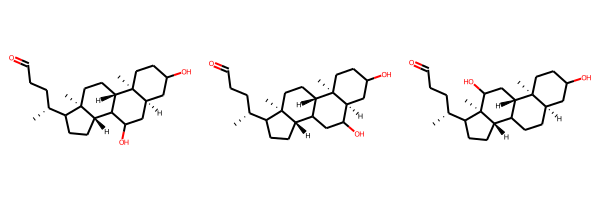

In [48]:
# Construct molecules from SMILES string using RDKit
di_tri_tetra_mol = [Chem.MolFromSmiles(x) for x in di_tri_tetra]

# View molecules
Draw.MolsToGridImage(di_tri_tetra_mol)

#### isolate dihydroxy BA from above substructures by removing tetra- and tri-hydroxy BA

In [49]:
# identify di-, tri-, and tetra-BA described in GNPS Library from SMILES in metadata
di_tri_tetra_mol_matched_list = [k for k,v in smiles_w_rdkit_obj_dict.items() for item in di_tri_tetra_mol if v.HasSubstructMatch(item)]

In [50]:
# Subselection of GNPS Library dataframe for rows containing di-, tri-, and tetra-BA
library_df_w_di_tri_tetra_matched = input_library_cleaned[input_library_cleaned['Smiles'].isin(di_tri_tetra_mol_matched_list)]

In [51]:
len(library_df_w_di_tri_tetra_matched)

1325

In [54]:
# list of tri- and tetra-BA to exclude from library_df_w_di_tri_tetra_matched and isolate di-BA
tri_tetra_ID_exclusion_list = library_df_w_tri_tetra_matched.index.to_list()

In [55]:
len(tri_tetra_ID_exclusion_list)

621

In [56]:
# Subselection of GNPS Library dataframe for rows containing di-BA data
library_df_w_dihydroxy_BA_only_matched = library_df_w_di_tri_tetra_matched[~library_df_w_di_tri_tetra_matched.index.isin(tri_tetra_ID_exclusion_list)]

In [57]:
library_df_w_dihydroxy_BA_only_matched

,index,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
spectrum_id,,,,,,,,,,,,,,,,,,,,,
CCMSLIB00004722204,4186,f.aaksenov/Nobel_study/Twins/Samples/TWDP_001_...,902c7059ff92477498fa4190e1e8c628,1714,2,GNPS-LIBRARY,1,"[[79.052254,35.000000],[80.061600,30.000000],[...",null-null-null-null,aaksenov,...,Positive,2019-01-11 14:53:10.0,902c7059ff92477498fa4190e1e8c628,NaN,CEMZGPKUKMFNNF-UHFFFAOYSA-N,CEMZGPKUKMFNNF-UHFFFAOYSA-N,C33H49NO5,C33H49NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00005436491,5039,f.MSV000081477/ccms_peak/mzXML/Plate6/C220_GA7...,578f8becb8314aca9a3bbce6621eaed1,1374,2,GNPS-LIBRARY,1,"[[105.074013,83.000000],[107.084953,199.000000...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:02:45.0,578f8becb8314aca9a3bbce6621eaed1,NaN,CYHFCBVFHBCQHF-UHFFFAOYSA-N,NaN,C35H50N2O5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00005436492,5040,f.MSV000082480/ccms_peak/mzXML/A23_120_20.mzML;,a5a766d2747549f5a154ebc66d15ecce,1873,2,GNPS-LIBRARY,1,"[[50.455456,678.341980],[51.303623,899.186401]...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:05:12.0,a5a766d2747549f5a154ebc66d15ecce,NaN,CEMZGPKUKMFNNF-UHFFFAOYSA-N,NaN,C33H49NO5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00005436493,5041,f.lfnothias/TEMP/CCMSLIB_adding_clustered.mgf;,6e683fa377d749bd919b6fce3c27b881,1,2,GNPS-LIBRARY,1,"[[81.070137,109557.789062],[93.070023,43555.72...",null-null-null-null,lfnothias,...,Positive,2019-12-10 17:02:03.0,6adb63dbdf0242e884f871b3142f68eb,NaN,CYHFCBVFHBCQHF-UHFFFAOYSA-N,NaN,C35H50N2O5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00005467947,5572,f.MSV000084630/peak/mzML/A45_181_11.mzML;,9e59c1b36ca340d5a669ddb90a38edfa,722,2,GNPS-LIBRARY,1,"[[51.654568,1701.583862],[55.055103,15476.3974...",null-null-null-null,lfnothias,...,Positive,2019-12-10 15:52:11.0,9e59c1b36ca340d5a669ddb90a38edfa,NaN,LJAIXMQYBNEUSB-UHFFFAOYSA-N,NaN,C30H52N2O5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCMSLIB00006118612,576352,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3521,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[153.225693,134730.703125],[186.113907,154933...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,WVULKSPCQVQLCU-BUXLTGKBSA-N,NaN,C26H43NO5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
CCMSLIB00006118614,576353,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3522,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[128.255997,162435.296875],[142.742096,150349...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,WVULKSPCQVQLCU-BUXLTGKBSA-N,NaN,C26H43NO5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
CCMSLIB00006118616,576354,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3523,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[127.004204,157320.000000],[130.210907,168844...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,WVULKSPCQVQLCU-BUXLTGKBSA-N,NaN,C26H43NO5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."


In [58]:
# Construct molecules from SMILES string using RDKit
library_df_w_dihydroxy_BA_only_matched_mol = [Chem.MolFromSmiles(x) for x in library_df_w_dihydroxy_BA_only_matched.Smiles.unique()]

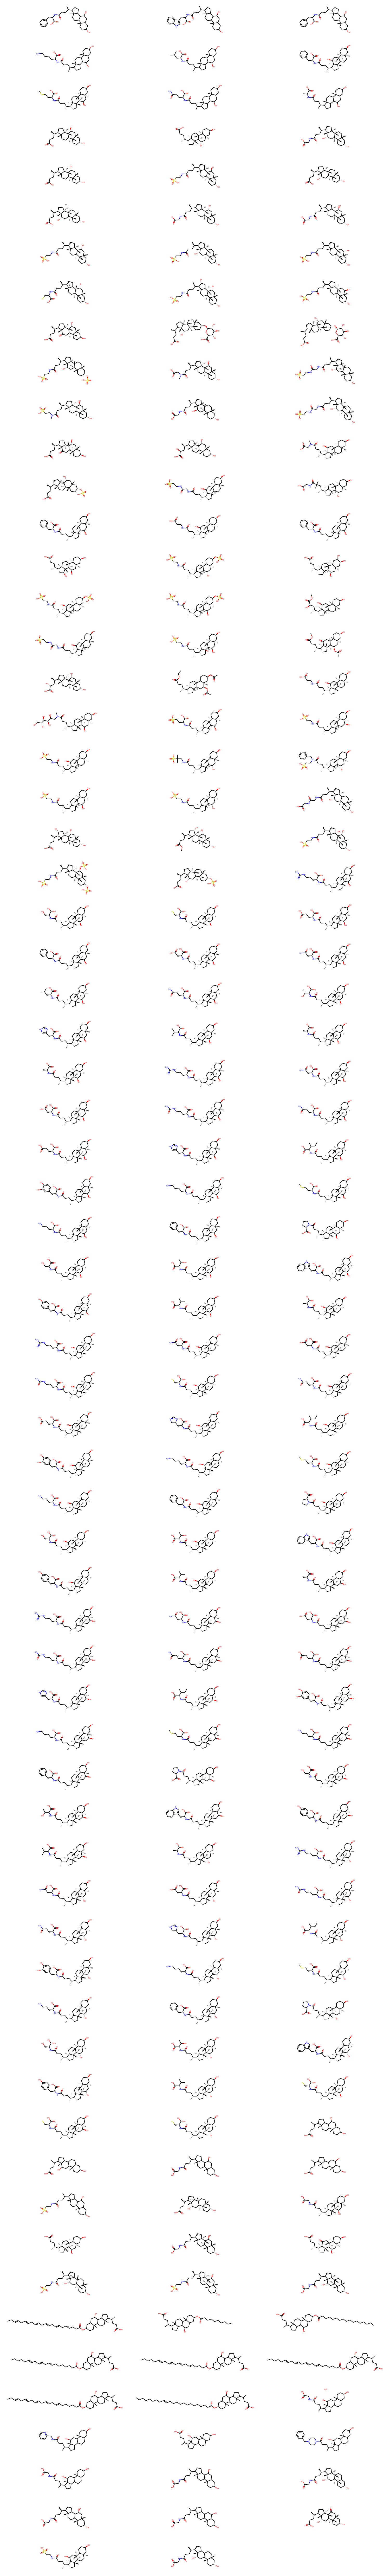

In [59]:
# View molecules
Draw.MolsToGridImage(library_df_w_dihydroxy_BA_only_matched_mol,subImgSize=(500,150), useSVG = False, maxMols=200)

##### Manual inspection of library_df_w_dihydroxy_BA_only_matched_mol describing the unique dihydroxy BA molecules identified by the substructure search identifies 12 SMILES not associated with di-BA; therefore, need to remove from dataframe.

In [60]:
# (original notebook content: v_all_di_massql_query_for_manuscript-Copy1.ipynb)

smiles_to_drop_because_not_di = ['[H][C@@]1([C@H](O)C[C@@H]2[C@]1(C)CC[C@H]3[C@]2([C@H](O)C[C@H]4[C@]3(C)CC[C@@H](O)C4)[H])[C@@H](CCC(NCCS(=O)(O)=O)=O)C',
 '[H][C@@]1([C@H](O)C[C@]2([H])[C@]1(C)CC[C@@]3([H])[C@@]2([H])[C@H](O)C[C@@]4([H])[C@]3(C)CC[C@@H](O)C4)[C@@H](CCC(O)=O)C',
 '[H][C@@]12C[C@H](O)CC[C@]1(C)[C@@]1([H])CC(=O)[C@]3(C)[C@]([H])(CC[C@@]3([H])[C@]1([H])[C@H](O)C2)[C@H](C)CCC(O)=O',
 'C[C@@H]([C@H]1CC[C@]2(O)[C@]1(C)CC[C@@]3([H])[C@@]2([H])[C@H](O)C[C@@]4([H])[C@]3(C)CC[C@@H](O)C4)CCC(NCCS(=O)(O)=O)=O',
 '[H][C@]12[C@@]3([C@H](O)C[C@@H]4C[C@H](O)CC[C@]4(C)[C@H]3CC[C@]1(C)[C@@H]([C@@H](CCC(O)=O)C)C[C@@H]2O)[H]',
 'O[C@H]1CC[C@@]2(C)[C@H](C[C@H](O)[C@]([C@H]3[C@@]4(C)[C@@H]([C@H](C)CCC(O)=O)CC3)([H])[C@@H]2CC4=O)C1',
 'C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)C(C[C@@]3([H])[C@@]2([H])[C@H](O)C[C@@]4([H])[C@]3(C)CC[C@H](O)C4)=O)CCC(O)=O',
 'C[C@@H]([C@H]1C[C@H](O)[C@]2([H])[C@]1(C)CC[C@@]3([H])[C@@]2([H])[C@H](O)C[C@@]4([H])[C@]3(C)CC[C@@H](O)C4)CCC(OC)=O',
 '[H][C@@]1([C@]2([C@@]3(C)[C@@H]([C@@H](CCC(OC)=O)C)CC2)[H])[C@H](OC(C)=O)C[C@]4([H])C[C@H](O)CC[C@]4(C)[C@H]1CC3=O',
 '[H][C@@]12[C@H](O)C[C@@H]3C[C@H](O)CC[C@]3(C)[C@H]1CC[C@@]4(C)[C@@]2(O)CC[C@@H]4[C@@H](CCC(NCCS(=O)(O)=O)=O)C',
 'C[C@H](CCC(=O)O)[C@H]1CC[C@@H]2[C@@]1([C@H](C[C@H]3[C@H]2C(=O)C[C@H]4[C@@]3(CC[C@H](C4)O)C)O)C',
 '[H][C@@]1([C@H](O)C[C@H]2[C@]3(C)C[C@H](O)[C@@H](O)C2)[C@@H]3CC[C@@]4(C)[C@H]1CC[C@@H]4[C@@H](CCC(O)=O)C'] 

In [61]:
# removal of SMILES not associated with di-BA
# Dataframe output is subselection of GNPS Library dataframe for rows ONLY containing di-BA data
library_df_w_dihydroxy_BA_only_matched_updated = library_df_w_dihydroxy_BA_only_matched[~library_df_w_dihydroxy_BA_only_matched['Smiles'].isin(smiles_to_drop_because_not_di)]

In [62]:
library_df_w_dihydroxy_BA_only_matched_updated

,index,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
spectrum_id,,,,,,,,,,,,,,,,,,,,,
CCMSLIB00004722204,4186,f.aaksenov/Nobel_study/Twins/Samples/TWDP_001_...,902c7059ff92477498fa4190e1e8c628,1714,2,GNPS-LIBRARY,1,"[[79.052254,35.000000],[80.061600,30.000000],[...",null-null-null-null,aaksenov,...,Positive,2019-01-11 14:53:10.0,902c7059ff92477498fa4190e1e8c628,NaN,CEMZGPKUKMFNNF-UHFFFAOYSA-N,CEMZGPKUKMFNNF-UHFFFAOYSA-N,C33H49NO5,C33H49NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00005436491,5039,f.MSV000081477/ccms_peak/mzXML/Plate6/C220_GA7...,578f8becb8314aca9a3bbce6621eaed1,1374,2,GNPS-LIBRARY,1,"[[105.074013,83.000000],[107.084953,199.000000...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:02:45.0,578f8becb8314aca9a3bbce6621eaed1,NaN,CYHFCBVFHBCQHF-UHFFFAOYSA-N,NaN,C35H50N2O5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00005436492,5040,f.MSV000082480/ccms_peak/mzXML/A23_120_20.mzML;,a5a766d2747549f5a154ebc66d15ecce,1873,2,GNPS-LIBRARY,1,"[[50.455456,678.341980],[51.303623,899.186401]...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:05:12.0,a5a766d2747549f5a154ebc66d15ecce,NaN,CEMZGPKUKMFNNF-UHFFFAOYSA-N,NaN,C33H49NO5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00005436493,5041,f.lfnothias/TEMP/CCMSLIB_adding_clustered.mgf;,6e683fa377d749bd919b6fce3c27b881,1,2,GNPS-LIBRARY,1,"[[81.070137,109557.789062],[93.070023,43555.72...",null-null-null-null,lfnothias,...,Positive,2019-12-10 17:02:03.0,6adb63dbdf0242e884f871b3142f68eb,NaN,CYHFCBVFHBCQHF-UHFFFAOYSA-N,NaN,C35H50N2O5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00005467947,5572,f.MSV000084630/peak/mzML/A45_181_11.mzML;,9e59c1b36ca340d5a669ddb90a38edfa,722,2,GNPS-LIBRARY,1,"[[51.654568,1701.583862],[55.055103,15476.3974...",null-null-null-null,lfnothias,...,Positive,2019-12-10 15:52:11.0,9e59c1b36ca340d5a669ddb90a38edfa,NaN,LJAIXMQYBNEUSB-UHFFFAOYSA-N,NaN,C30H52N2O5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCMSLIB00006118612,576352,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3521,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[153.225693,134730.703125],[186.113907,154933...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,WVULKSPCQVQLCU-BUXLTGKBSA-N,NaN,C26H43NO5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
CCMSLIB00006118614,576353,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3522,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[128.255997,162435.296875],[142.742096,150349...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,WVULKSPCQVQLCU-BUXLTGKBSA-N,NaN,C26H43NO5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
CCMSLIB00006118616,576354,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3523,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[127.004204,157320.000000],[130.210907,168844...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,WVULKSPCQVQLCU-BUXLTGKBSA-N,NaN,C26H43NO5,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."


### Save file

In [31]:
library_df_w_dihydroxy_BA_only_matched_updated.reset_index().to_csv(
    '/home/jovyan/work/notebooks/outputs/library_df_dihydroxy_BA_only_m+h_updated_matches.csv', sep=',', index=False)